<a href="https://colab.research.google.com/github/Aboubacar2012/Data_Analysis_Project/blob/main/Finance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read data
df=pd.read_excel('/content/drive/MyDrive/ml_data/Data_Analysis/Finance Data Analysis /Bank_Personal_Loan_Modelling.xlsx',1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# Remove ID and Zip Code (not relevant for data analysis)
df.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [8]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [9]:
import plotly.express as px
fig=px.box(df, y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

###### Visualise Distribution of Data
###### Data preparation for experience feature 

In [11]:
### Let's check the type of skewness that we have in each every type of feature 
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

#######from that skewness we can conclud that Age has low outliers and Income has high outliers 

In [12]:
# Data type 
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e025db190>,
      dtype=object)

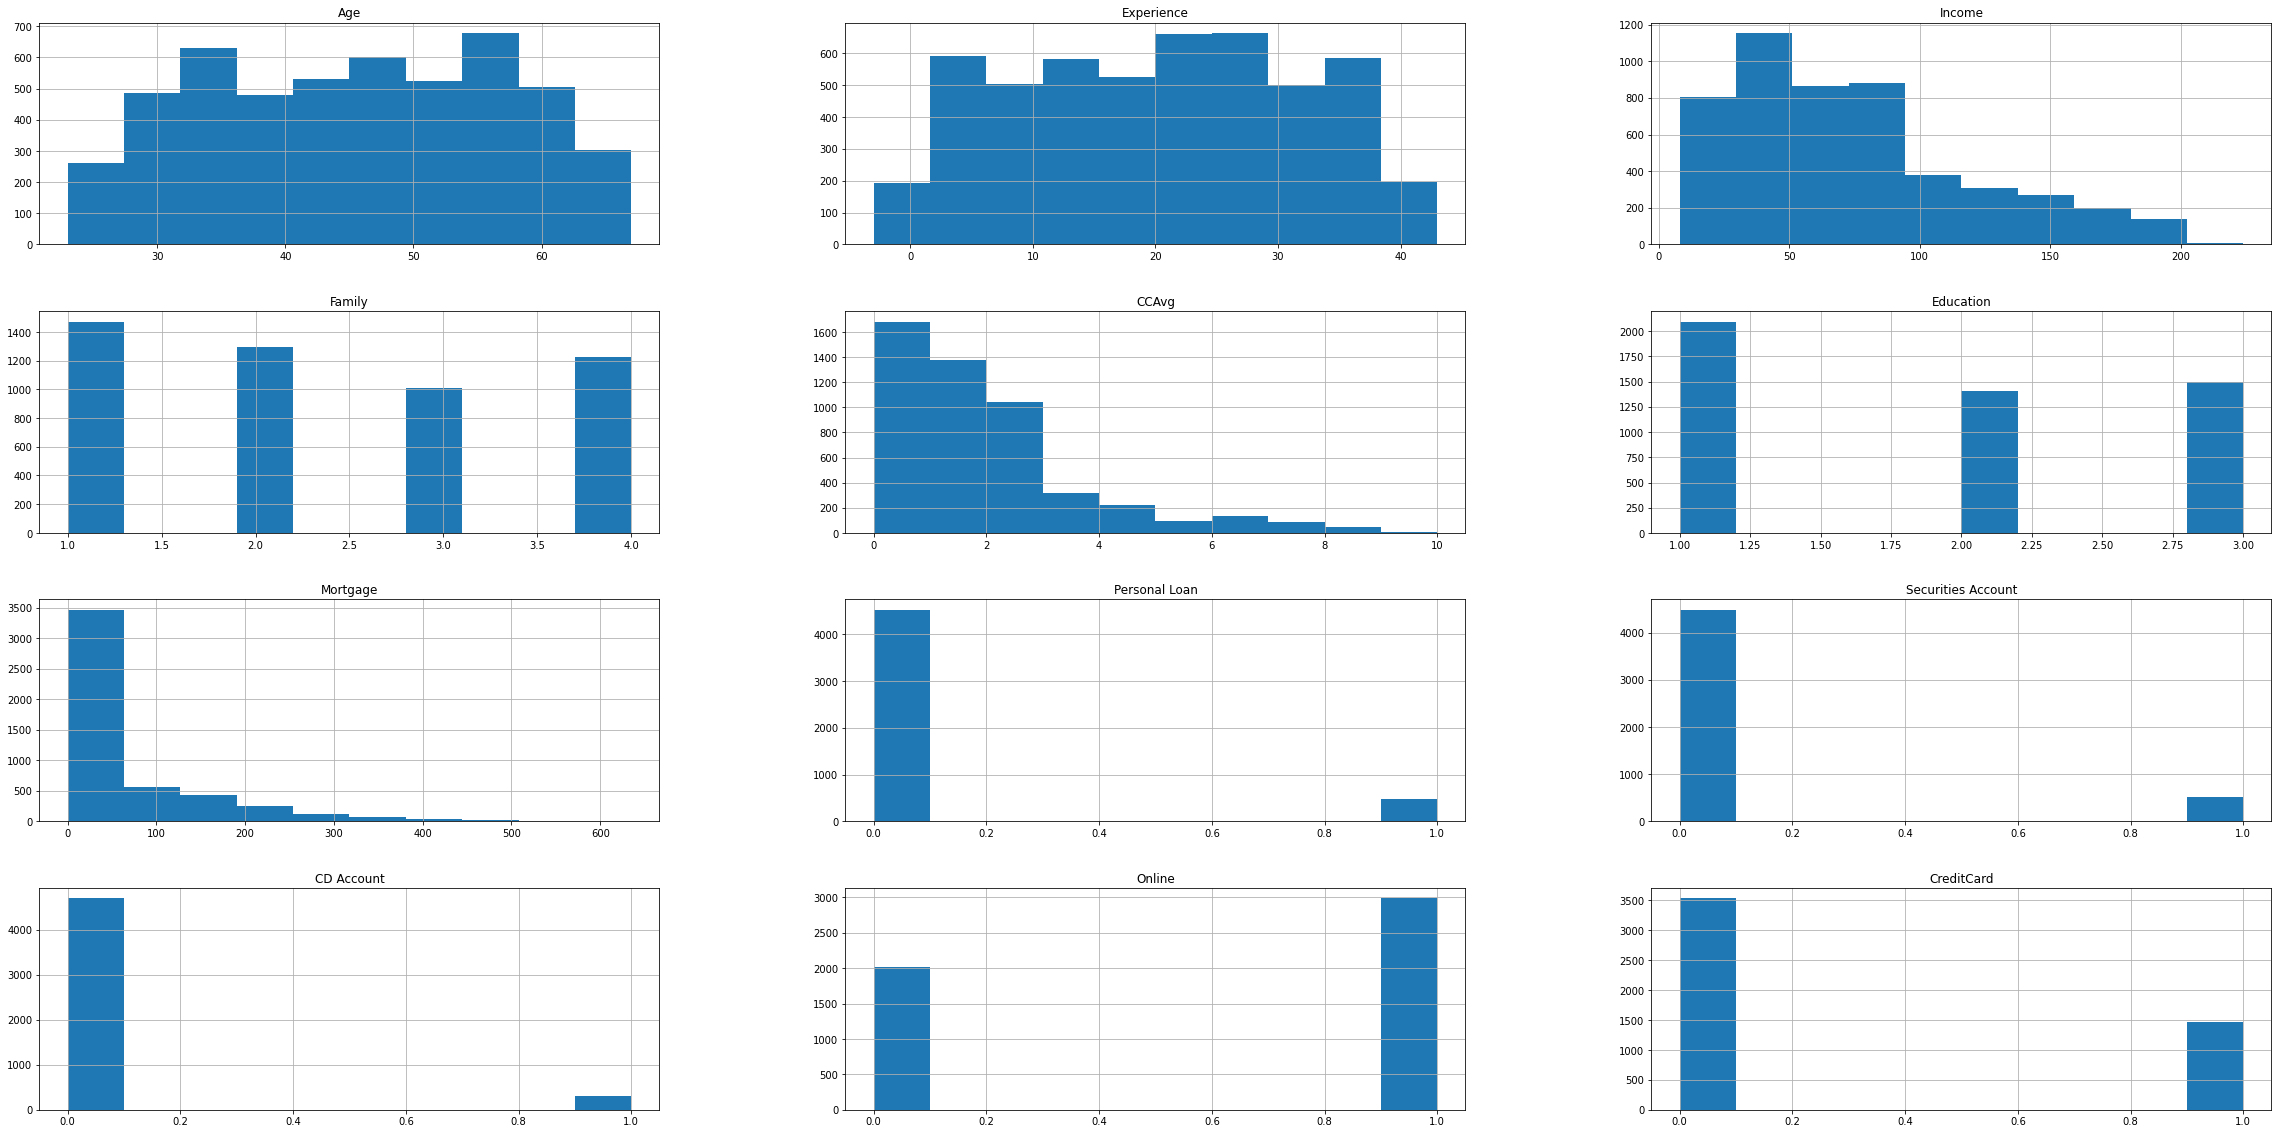

In [14]:
# Visualize the distribution of data 
df.hist(figsize=(40,20))

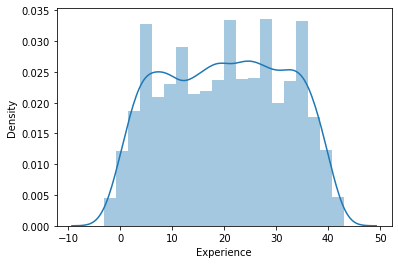

In [16]:
# Visualise experience distribution
sns.distplot(df['Experience'])

In [17]:
# Mean
df['Experience'].mean()

20.1046

In [18]:
Negative_exper=df[df['Experience']<0]
Negative_exper.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


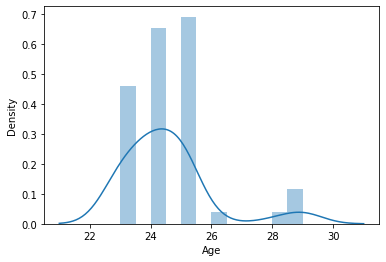

In [20]:
# let's see the distribution of age in this negative experience
sns.distplot(Negative_exper['Age']) # We can see it's dirty of data we have preprocess in this data

In [21]:
# Mean of Negative experience
Negative_exper['Experience'].mean()

-1.4423076923076923

In [22]:
# Total of Entries (Enregistrement)
Negative_exper.size

624

In [24]:
print('There are {} records which has negative values for experience, approx {}%'.format(Negative_exper.size, ((Negative_exper.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04%


In [25]:
data=df.copy()

In [26]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [27]:
# Let's deal with Negative experience
data['Experience']=np.where(data['Experience']<0, data['Experience'].mean(), data['Experience'])

In [29]:
# Let's check if we still have negative experience in our dataset
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Q1-Let's Analyse the co-relation of data
Q2 : Analyse Education Status of customers

In [30]:
# Correlation 
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


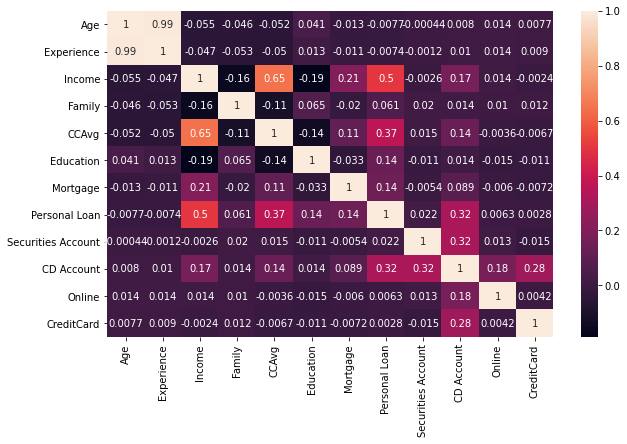

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [38]:
# To avoid multi-colliarity we have to drop some feature 
data.drop(['Experience'], axis=1, inplace=True)

In [39]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [40]:
#Q2 : Analyse Education Status of customers
data['Education'].unique()

array([1, 2, 3])

In [41]:
def mark(x):
  if x==1:
    return 'Undergratued'
  elif x==2:
    return 'Graduate'
  else : 
    return 'Advanced/Professional'

In [42]:
data['Edumark']=data['Education'].apply(mark)

In [43]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edumark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergratued
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergratued
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergratued
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [45]:
EDU_dis=data.groupby('Edumark')['Age'].count()

In [46]:
EDU_dis

Edumark
Advanced/Professional    1501
Graduate                 1403
Undergratued             2096
Name: Age, dtype: int64

In [47]:
#let's plot
fig=px.pie(data, values=EDU_dis, names=EDU_dis.index, title='Pie Chart')
fig.show()

#####Analyse Account holder distribution

In [48]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edumark'],
      dtype='object')

In [51]:
# Securities Account and CD account 
def security_cd(row):
  if (row['Securities Account']==1)& (row['CD Account']==1):
    return 'Holds Security & Deposit'
  elif (row['Securities Account']==0)& (row['CD Account']==0):
    return 'Does not Holds Securities or Deposit'
  elif (row['Securities Account']==1)& (row['CD Account']==0):
    return 'Holds Only Securities'
  elif (row['Securities Account']==0)& (row['CD Account']==1):
    return 'Holds Only Deposit'

In [52]:
data['Acount_holder_category']=data.apply(security_cd, axis=1)

In [53]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edumark,Acount_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergratued,Holds Only Securities
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergratued,Holds Only Securities
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergratued,Does not Holds Securities or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securities or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securities or Deposit


In [54]:
# Let's plot it 
values=data['Acount_holder_category'].value_counts()

In [55]:
values

Does not Holds Securities or Deposit    4323
Holds Only Securities                    375
Holds Only Deposit                       155
Holds Security & Deposit                 147
Name: Acount_holder_category, dtype: int64

In [56]:
#let's plot
fig=px.pie(data, values=values, names=values.index, title='Pie Chart')
fig.show()

######Automate Analysis


In [57]:
# Q1. Analysis Customer on the basis of their Education status, Income & Personal Loan Status
# Q2. Automate your Analysis

In [58]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edumark', 'Acount_holder_category'],
      dtype='object')

In [59]:
px.box(data, x='Education', y='Income')

In [60]:
px.box(data, x='Education', y='Income', facet_col='Personal Loan')

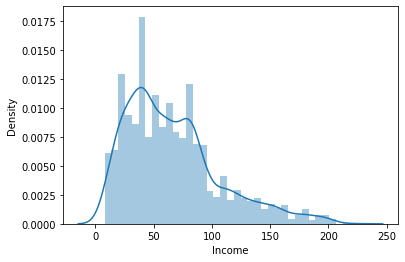

In [62]:
sns.distplot(data[data['Personal Loan']==0]['Income'])

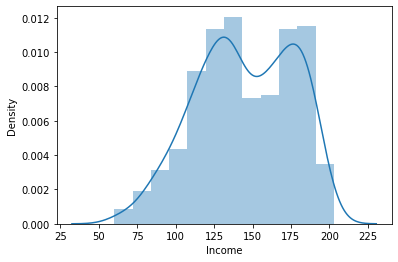

In [63]:
sns.distplot(data[data['Personal Loan']==1]['Income'])

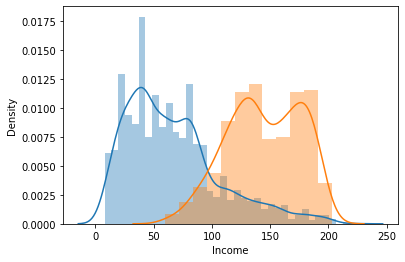

In [64]:
sns.distplot(data[data['Personal Loan']==0]['Income'])
sns.distplot(data[data['Personal Loan']==1]['Income'])

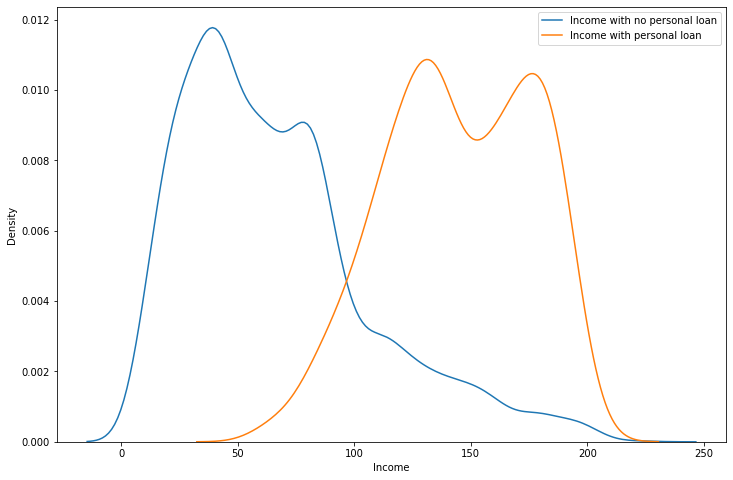

In [67]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'], hist=False, label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'], hist=False, label='Income with personal loan')
plt.legend()

In [68]:
# Automate Analysis 
# let's create a function for that 
def plot(col1, col2, label1, label2, title):
  plt.figure(figsize=(12,8))
  sns.distplot(data[data[col2]==0][col1], hist=False, label=label1)
  sns.distplot(data[data[col2]==1][col1], hist=False, label=label2)
  plt.legend()
  plt.title(title)

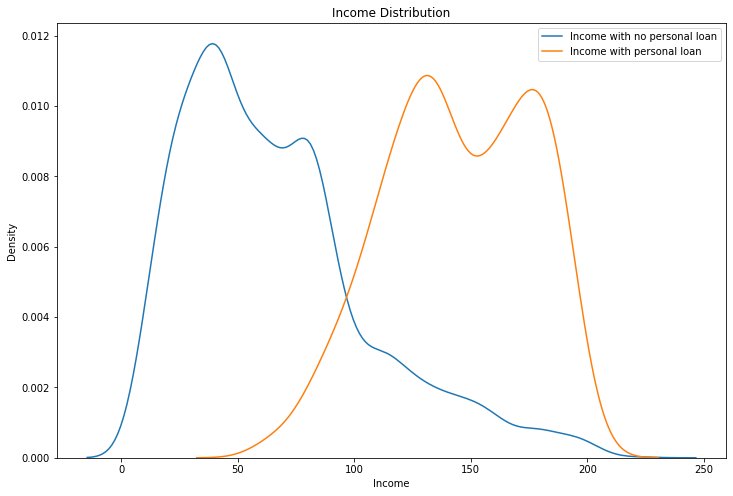

In [69]:
plot('Income','Personal Loan', 'Income with no personal loan','Income with personal loan','Income Distribution')

In [71]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edumark', 'Acount_holder_category'],
      dtype='object')

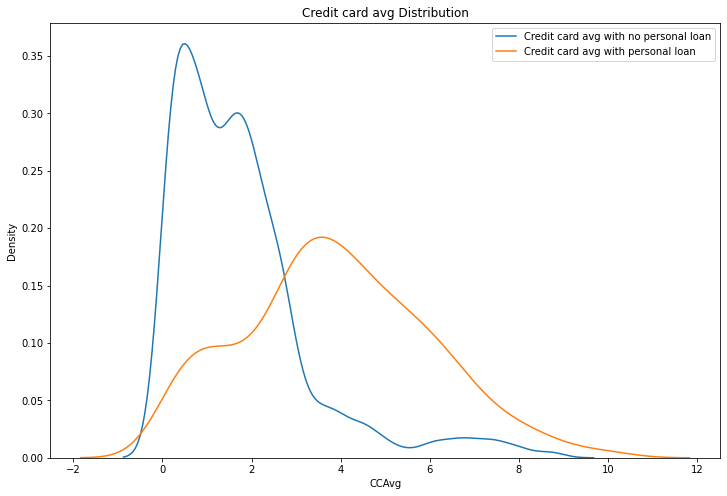

In [72]:
#CCAvg vs Personal Loan
plot('CCAvg','Personal Loan', 'Credit card avg with no personal loan','Credit card avg with personal loan','Credit card avg Distribution')

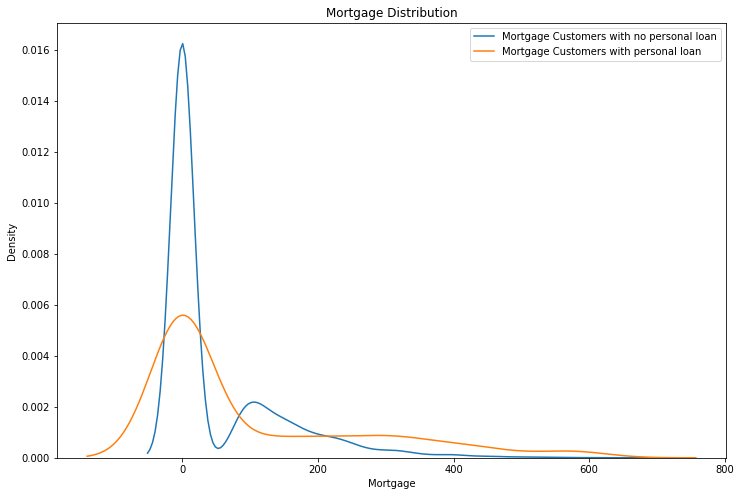

In [74]:
#Mortgage vs Personal Loan
plot('Mortgage','Personal Loan', 'Mortgage Customers with no personal loan','Mortgage Customers with personal loan','Mortgage Distribution')

###### Analysis Customers Behaviour on the basis of various attributes

In [75]:
# Analyse categories of customers on the basis of Security account, Online, Account_holder category & Credit Card..
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edumark', 'Acount_holder_category'],
      dtype='object')

In [76]:
col_names=['Securities Account','Online','Acount_holder_category','CreditCard']

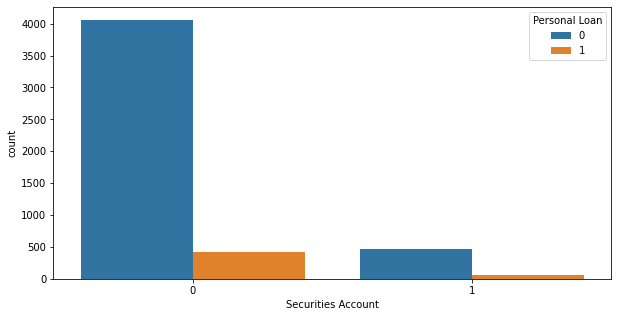

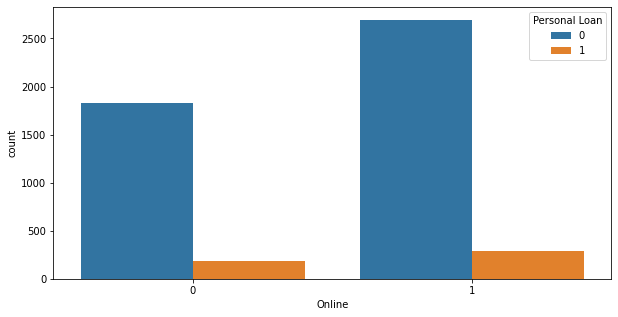

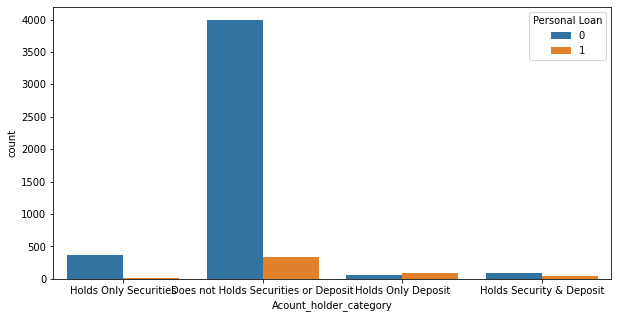

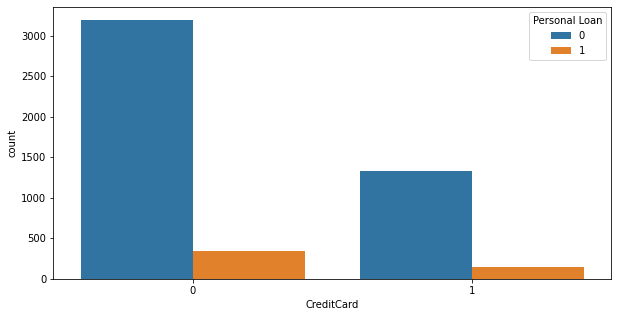

In [81]:
for i in col_names:
  plt.figure(figsize=(10,5))
  sns.countplot(x=i, hue='Personal Loan', data=data)

In [82]:
# How age of person is going to be a factor in available loan? 
# Automate above stuffs
# Does income of a person have an impact on availing loan 
# Does the family size makes them avail loan?

In [84]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edumark', 'Acount_holder_category'],
      dtype='object')

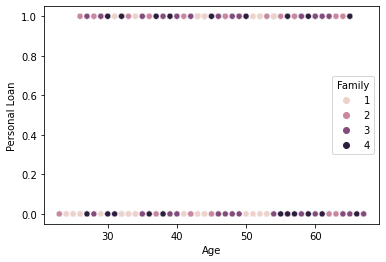

In [85]:
sns.scatterplot(data['Age'], data['Personal Loan'], hue=data['Family'])

In [86]:
import scipy.stats as stats

In [104]:
# Hypothesis
HO='Age does not have an impact on availing Personal Loan'
Ha='Age does have an impact on availing Personal Loan'

In [105]:
Age_no=np.array(data[data['Personal Loan']==0]['Age'])
Age_yes=np.array(data[data['Personal Loan']==1]['Age'])

In [106]:
# Two samples T-test
t, p_value=stats.ttest_ind(Age_no, Age_yes, axis=0)
if p_value<0.05:
    print(Ha,'as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
  print(H0,'as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on availing Personal Loan as the p_value is greater than 0.05 with a value of 0.584959263705325


In [107]:
# Let's automate the hypothesis
def Hypothesis(col1, col2, HO,Ha):
  arr1=np.array(data[data[col1]==0][col2])
  arr2=np.array(data[data[col1]==1][col2])
  t, p_value=stats.ttest_ind(arr1, arr2, axis=0)
  if p_value<0.05:
    print('{} as the p_value is less than 0.05 with a value of {}'.format(Ha, p_value))
  else:
    print('{} as the p_value is greater than 0.05 with a value of {}'.format(HO, p_value))

In [109]:
Hypothesis('Personal Loan','Age', HO='Age does not have an impact on availing Personal Loan', Ha='Age does have an impact on availing Personal Loan')

Age does not have an impact on availing Personal Loan as the p_value is greater than 0.05 with a value of 0.584959263705325


In [111]:
# Income & Personal Loan
Hypothesis('Personal Loan','Income', HO='Income does not have an impact on availing Personal Loan', Ha='Income does have an impact on availing Personal Loan')

Income does have an impact on availing Personal Loan as the p_value is less than 0.05 with a value of 0.0


In [112]:
# Family & Personal Loan
Hypothesis('Personal Loan','Family', HO='Family does not have an impact on availing Personal Loan', Ha='Family does have an impact on availing Personal Loan')

Family does have an impact on availing Personal Loan as the p_value is less than 0.05 with a value of 1.4099040685673807e-05
